In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

In [3]:
df = pd.read_csv('Train_clean.csv')
df_test = pd.read_csv('Test_clean.csv')

In [4]:
df.shape

(2316, 20)

In [5]:
df_test.shape

(1500, 19)

In [5]:
df.drop('customer_id',axis=1, inplace=True)

In [6]:
df.head()

,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
0,15.0,452,no,no,0.0,121.1,130.0,20.59,216.0,86.0,18.36,235.1,90.0,10.58,16.1,5.0,4.35,2.0,No
1,105.0,452,no,no,0.0,259.3,96.0,44.08,175.2,97.0,14.89,222.4,90.0,10.01,12.0,5.0,3.24,3.0,No
2,97.0,452,no,yes,32.0,183.4,94.0,31.18,269.1,120.0,22.87,203.5,90.0,9.16,6.7,4.0,1.81,1.0,No
3,121.0,445,no,yes,35.0,68.7,95.0,11.68,209.2,69.0,17.78,197.4,90.0,8.88,11.4,4.0,3.08,1.0,No
4,98.0,452,no,yes,22.0,278.3,89.0,47.31,93.4,143.0,7.94,107.6,90.0,4.84,9.7,5.0,2.62,0.0,No


In [7]:
df_test.head()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,3322,91.0,445.0,yes,no,0.0,258.4,112.0,42.89,190.0,93.0,14.47,158.6,105.0,7.09,12.1,3.0,3.27,2.0
1,3323,113.0,445.0,no,yes,20.0,155.8,81.0,28.83,168.5,62.0,13.73,275.5,105.0,12.22,8.7,3.0,2.35,1.0
2,3324,122.0,445.0,no,no,0.0,237.2,137.0,40.30,263.8,134.0,22.76,251.3,105.0,10.81,8.8,4.0,2.38,1.0
3,3325,103.0,445.0,no,no,0.0,133.6,117.0,23.60,156.1,130.0,13.37,207.2,105.0,9.95,10.4,7.0,2.81,1.0
4,3326,111.0,452.0,no,no,0.0,115.6,120.0,24.54,211.1,66.0,18.79,140.9,105.0,5.76,12.7,1.0,3.43,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          2316 non-null   float64
 1   location_code           2316 non-null   int64  
 2   intertiol_plan          2316 non-null   object 
 3   voice_mail_plan         2316 non-null   object 
 4   number_vm_messages      2316 non-null   float64
 5   total_day_min           2316 non-null   float64
 6   total_day_calls         2316 non-null   float64
 7   total_day_charge        2316 non-null   float64
 8   total_eve_min           2316 non-null   float64
 9   total_eve_calls         2316 non-null   float64
 10  total_eve_charge        2316 non-null   float64
 11  total_night_minutes     2316 non-null   float64
 12  total_night_calls       2316 non-null   float64
 13  total_night_charge      2316 non-null   float64
 14  total_intl_minutes      2316 non-null   

In [9]:
df.iloc[1,]

account_length            105.0
location_code               452
intertiol_plan               no
voice_mail_plan              no
number_vm_messages          0.0
total_day_min             259.3
total_day_calls            96.0
total_day_charge          44.08
total_eve_min             175.2
total_eve_calls            97.0
total_eve_charge          14.89
total_night_minutes       222.4
total_night_calls          90.0
total_night_charge        10.01
total_intl_minutes         12.0
total_intl_calls            5.0
total_intl_charge          3.24
customer_service_calls      3.0
Churn                        No
Name: 1, dtype: object

In [10]:
df.iloc[1,]

account_length            105.0
location_code               452
intertiol_plan               no
voice_mail_plan              no
number_vm_messages          0.0
total_day_min             259.3
total_day_calls            96.0
total_day_charge          44.08
total_eve_min             175.2
total_eve_calls            97.0
total_eve_charge          14.89
total_night_minutes       222.4
total_night_calls          90.0
total_night_charge        10.01
total_intl_minutes         12.0
total_intl_calls            5.0
total_intl_charge          3.24
customer_service_calls      3.0
Churn                        No
Name: 1, dtype: object

In [10]:
df_test.isnull().sum()

customer_id               0
account_length            0
location_code             0
intertiol_plan            0
voice_mail_plan           0
number_vm_messages        0
total_day_min             0
total_day_calls           0
total_day_charge          0
total_eve_min             0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
dtype: int64

<AxesSubplot:>

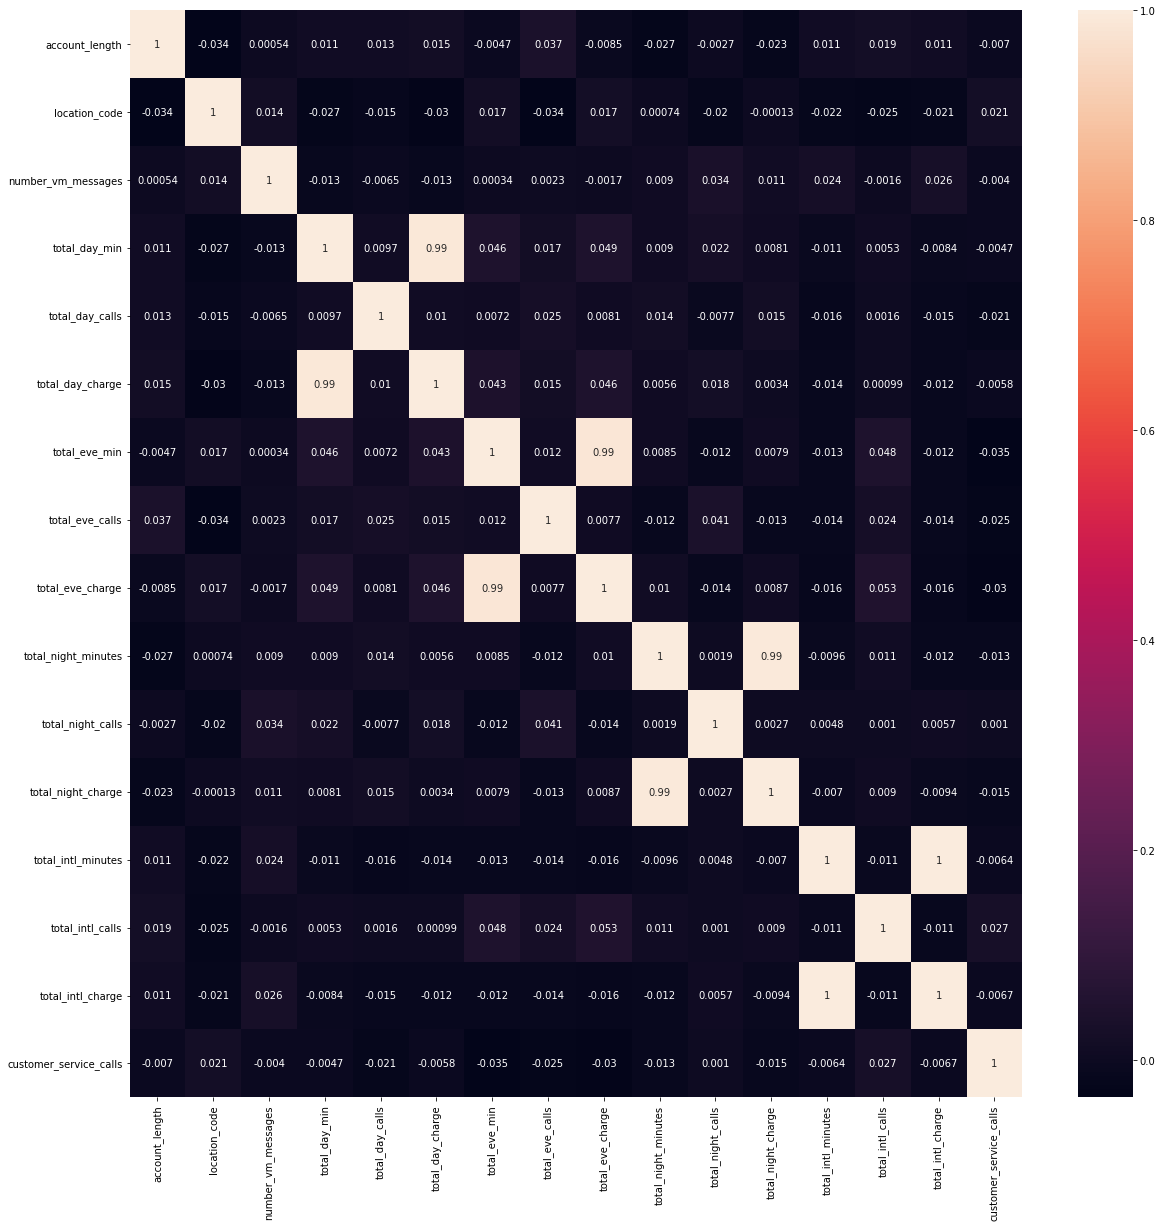

In [11]:
df_corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_corr, annot=True)

In [12]:
cat_var = [ feature for feature in df.columns if df[feature].dtypes=='O']

In [13]:
cat_var

['intertiol_plan', 'voice_mail_plan', 'Churn']

In [14]:
num_var = [feature for feature in df.columns if df[feature].dtypes != 'O']

In [15]:
num_var

['account_length',
 'location_code',
 'number_vm_messages',
 'total_day_min',
 'total_day_calls',
 'total_day_charge',
 'total_eve_min',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'customer_service_calls']

In [16]:
df.intertiol_plan.replace(['no','yes'],[0,1],inplace = True)
df.voice_mail_plan.replace(['no','yes'],[0,1],inplace = True)
df.Churn.replace(['No','Yes'],[0,1],inplace = True)

In [17]:

df_test.intertiol_plan.replace(['no','yes'],[0,1],inplace = True)
df_test.voice_mail_plan.replace(['no','yes'],[0,1],inplace = True)

<AxesSubplot:>

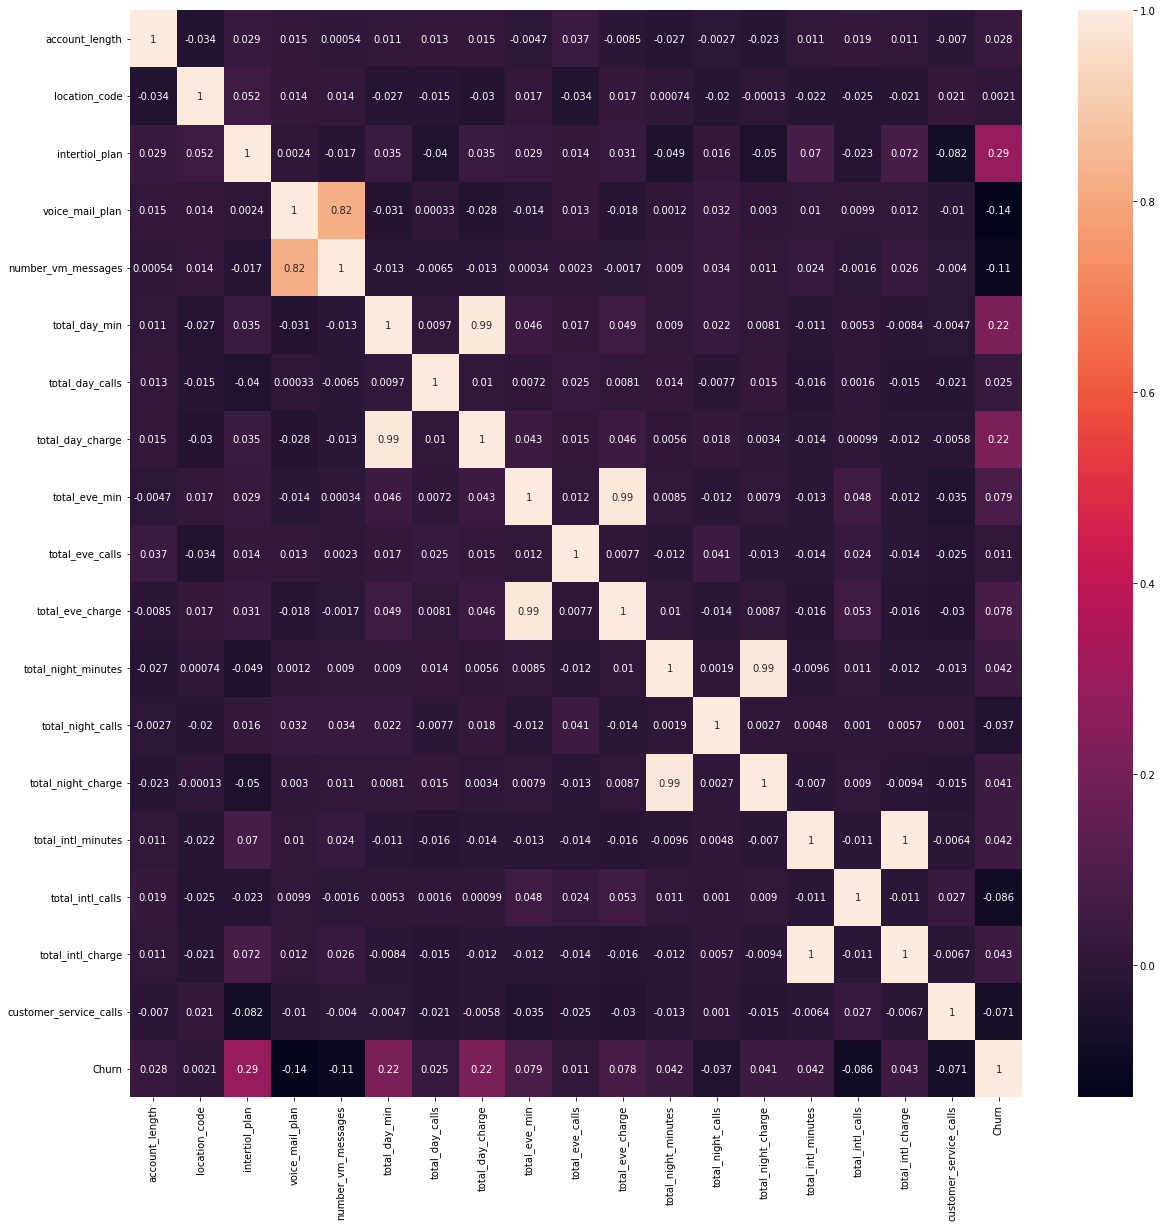

In [18]:
df_corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_corr, annot=True)

In [19]:
df['total_local_charge']=df['total_night_charge']+df['total_eve_charge']+df['total_day_charge']
#df['total_local_calls']= df['total_night_calls']+df['total_eve_calls']+df['total_day_calls']
#df['total_local_min']= df['total_night_minutes']+df['total_eve_min']+df['total_day_min']

In [20]:
df['day_rate'] = df['total_day_charge']/df['total_day_min']
df['eve_rate'] = df['total_eve_charge']/df['total_eve_min']
df['night_rate'] = df['total_night_charge']/df['total_night_minutes']
df['intl_rate'] = df['total_intl_charge']/df['total_intl_minutes']

#df.drop(columns=['total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_min', 
                     'total_eve_min', 'total_night_minutes', 'number_vm_messages'
                     , 'total_intl_minutes', 'account_length'], inplace=True)
#'total_day_charge', 'total_eve_charge','total_night_charge',

In [21]:
#df.drop({'total_day_min','total_eve_charge','total_night_minutes','total_intl_minutes','number_vm_messages'},axis=1, inplace=True)

In [22]:
df_test['total_local_charge']=df_test['total_night_charge']+df_test['total_eve_charge']+df_test['total_day_charge']
#df_test['total_local_calls']= df_test['total_night_calls']+df_test['total_eve_calls']+df_test['total_day_calls']
#df['total_local_min']= df['total_night_minutes']+df['total_eve_min']+df['total_day_min']

In [23]:
df_test['day_rate'] = df_test['total_day_charge']/df_test['total_day_min']
df_test['eve_rate'] = df_test['total_eve_charge']/df_test['total_eve_min']
df_test['night_rate'] = df_test['total_night_charge']/df_test['total_night_minutes']
df_test['intl_rate'] = df_test['total_intl_charge']/df_test['total_intl_minutes']

#df_test.drop(columns=['total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_min', 
                     'total_eve_min', 'total_night_minutes', 'number_vm_messages'
                     , 'total_intl_minutes', 'account_length'], inplace=True)
#'total_day_charge', 'total_eve_charge','total_night_charge',

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_corr, annot=True)

In [31]:
x = df.drop('Churn',axis=1).values
y = df.Churn.values
id_submission = df_test.customer_id
df_test = df_test.drop('customer_id', axis=1)
# spliting the data into test and train
X_train, X_test , y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=0)

In [ ]:
df.columns

In [24]:
cols = [        'account_length',         'intertiol_plan',"location_code",
              'voice_mail_plan',     'number_vm_messages',
                'total_day_min',        'total_day_calls',
             'total_day_charge',          'total_eve_min',
              'total_eve_calls',       'total_eve_charge',
          'total_night_minutes',      'total_night_calls',
           'total_night_charge',     'total_intl_minutes',
             'total_intl_calls',      'total_intl_charge',
       'customer_service_calls',                            
           'total_local_charge',
                     'day_rate',               'eve_rate',
                   'night_rate',              'intl_rate']

In [32]:
def feature_importance(dataframe,features,target,model):
    model.fit(dataframe[features],dataframe[target])
    impos = model.coef_[0]
    for i,v in enumerate(impos):
        print('%0d Feature: %s   , Score: %.5f' % (i,features[i],v))

    plt.bar([str(features[x]) for x in range(len(impos))], impos)
    plt.xticks(rotation=90)
    plt.show()

In [60]:
feature_importance(df, cols, df.Churn, RandomForestClassifier())

KeyError: "None of [Int64Index([0, 0, 0, 0, 0, 0, 1, 0, 1, 0,\n            ...\n            1, 0, 0, 0, 0, 0, 0, 1, 1, 1],\n           dtype='int64', length=2316)] are in the [columns]"

C:\Users\nipun\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\_memmapping_reducer.py:607: UserWarning: Failed to delete temporary folder: C:\Users\nipun\AppData\Local\Temp\joblib_memmapping_folder_20840_3d4dedebef95414fb29f80dbe519caab_8dafeb6863ba404c824849c0099d4d05
  warnings.warn("Failed to delete temporary folder: {}"
C:\Users\nipun\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\_memmapping_reducer.py:607: UserWarning: Failed to delete temporary folder: C:\Users\nipun\AppData\Local\Temp\joblib_memmapping_folder_20840_3d4dedebef95414fb29f80dbe519caab_a83606a5035747c19ca78610ac0e2fad
  warnings.warn("Failed to delete temporary folder: {}"


In [34]:
from sklearn.inspection import permutation_importance

forest = RandomForestClassifier(random_state=0)
forest.fit(x,y)
result = permutation_importance(
    forest,x, y, n_repeats=10, random_state=42, n_jobs=2,scoring='accuracy'
)



forest_importances = pd.Series(result.importances_mean, index=cols)

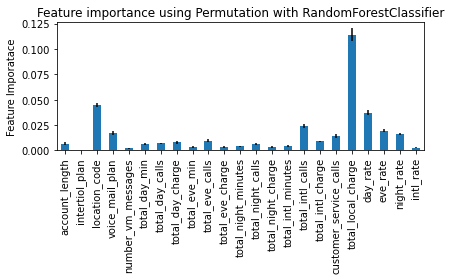

<Figure size 432x288 with 0 Axes>

In [35]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importance using Permutation with RandomForestClassifier")
ax.set_ylabel("Feature Imporatace")
fig.tight_layout()
plt.show()
plt.savefig('feature rf1.png')

Feature Importances :  [0.01354178 0.06892327 0.01462416 0.2180784  0.01753363 0.01373079
 0.01580166 0.01335042 0.01688526 0.01526294 0.01346888 0.01860362
 0.01264456 0.02192841 0.0383922  0.05645236 0.01569894 0.05309186
 0.09560046 0.16569799 0.04073127 0.04598229 0.01397484]


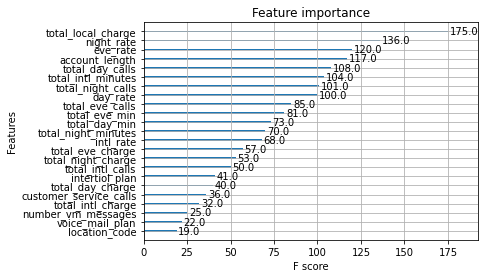

<Figure size 432x288 with 0 Axes>

In [36]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(df[cols], df['Churn'])

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()
plt.savefig('feature imtance.png')

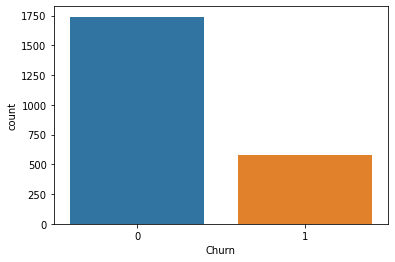

In [37]:
# showing the imbalanced class
sns.countplot(x = 'Churn', data = df)
plt.show()

In [ ]:
df.shape

In [ ]:
x

In [38]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline

imp = mutual_info_classif(x, y)
feat_imp=pd.Series(imp, df.columns[0: len(df.columns)-1])
feat_imp                                  

account_length            0.044988
location_code             0.006738
intertiol_plan            0.030487
voice_mail_plan           0.026936
number_vm_messages        0.011822
total_day_min             0.075445
total_day_calls           0.000000
total_day_charge          0.078513
total_eve_min             0.007504
total_eve_calls           0.000000
total_eve_charge          0.053490
total_night_minutes       0.000000
total_night_calls         0.003544
total_night_charge        0.088895
total_intl_minutes        0.030510
total_intl_calls          0.004152
total_intl_charge         0.021973
customer_service_calls    0.000000
Churn                     0.112124
total_local_charge        0.199933
day_rate                  0.181264
eve_rate                  0.182851
night_rate                0.027830
dtype: float64

In [39]:
# feat_imp.plot(kind='barh')
# plt.savefig('feature mutaual info.png')

In [40]:
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))
# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=1)   
X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())
                                         
print('After upsampling count of label 0 {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_s==1)))

Before upsampling count of label 0 1228
Before upsampling count of label 1 393
After upsampling count of label 0 1228
After upsampling count of label 1 1228


In [41]:
df.drop('Churn',axis=1).head()

,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,total_local_charge,day_rate,eve_rate,night_rate,intl_rate
0,15.0,452,0,0,0.0,121.1,130.0,20.59,216.0,86.0,...,10.58,16.1,5.0,4.35,2.0,49.53,0.170025,0.085000,0.045002,0.270186
1,105.0,452,0,0,0.0,259.3,96.0,44.08,175.2,97.0,...,10.01,12.0,5.0,3.24,3.0,68.98,0.169996,0.084989,0.045009,0.270000
2,97.0,452,0,1,32.0,183.4,94.0,31.18,269.1,120.0,...,9.16,6.7,4.0,1.81,1.0,63.21,0.170011,0.084987,0.045012,0.270149
3,121.0,445,0,1,35.0,68.7,95.0,11.68,209.2,69.0,...,8.88,11.4,4.0,3.08,1.0,38.34,0.170015,0.084990,0.044985,0.270175
4,98.0,452,0,1,22.0,278.3,89.0,47.31,93.4,143.0,...,4.84,9.7,5.0,2.62,0.0,60.09,0.169996,0.085011,0.044981,0.270103


In [42]:
df_test.shape

(1500, 23)

In [43]:
df_test.head()

,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,total_local_charge,day_rate,eve_rate,night_rate,intl_rate
0,91.0,445.0,1,0,0.0,258.4,112.0,42.89,190.0,93.0,...,7.09,12.1,3.0,3.27,2.0,64.45,0.165983,0.076158,0.044704,0.270248
1,113.0,445.0,0,1,20.0,155.8,81.0,28.83,168.5,62.0,...,12.22,8.7,3.0,2.35,1.0,54.78,0.185045,0.081484,0.044356,0.270115
2,122.0,445.0,0,0,0.0,237.2,137.0,40.30,263.8,134.0,...,10.81,8.8,4.0,2.38,1.0,73.87,0.169899,0.086277,0.043016,0.270455
3,103.0,445.0,0,0,0.0,133.6,117.0,23.60,156.1,130.0,...,9.95,10.4,7.0,2.81,1.0,46.92,0.176647,0.085650,0.048021,0.270192
4,111.0,452.0,0,0,0.0,115.6,120.0,24.54,211.1,66.0,...,5.76,12.7,1.0,3.43,1.0,49.09,0.212284,0.089010,0.040880,0.270079


#

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train_s)
X_test = sc_X.fit_transform(X_test)

df_test_X = sc_X.fit_transform(df_test.values)

In [44]:
X_train = X_train_s

In [45]:
X_train.shape

(2456, 23)

In [46]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [47]:
def performance(y_test, y_pred):
    f1 = f1_score(y_test, y_pred)
    accuracy=accuracy_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    precision  = precision_score(y_test, y_pred)
    print("\nf1_score\t: ", f1)
    print("\naccuracy\t: ", accuracy)
    print("\nrecall\t", recall)
    print("\nprec\t", precision)


# SVM

In [48]:
svc = SVC(kernel='rbf', decision_function_shape='ovr')
svc.fit(X_train, y_train_s)

SVC()

In [49]:
import pickle

In [50]:
y_pred = svc.predict(X_test)

In [51]:
performance(y_test, y_pred)


f1_score	:  0.4593837535014006

accuracy	:  0.7223021582733813

recall	 0.45054945054945056

prec	 0.4685714285714286


C:\Users\nipun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


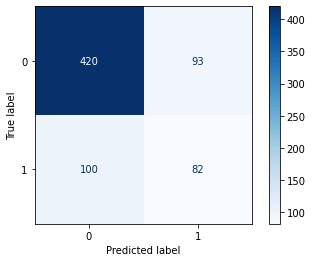

In [52]:
from sklearn.metrics import plot_confusion_matrix

m=plot_confusion_matrix(svc, X_test, y_test, cmap='Blues')
plt.grid(False)
plt.savefig('confusion svc.png')

In [ ]:
pp = svc.predict(df_test_X)

In [ ]:
result = pd.DataFrame({
    'customer_id': id_submission,
    'Churn': pp
})

In [ ]:
result

In [ ]:
result.Churn.replace([0,1],['No','Yes'], inplace=True)

In [ ]:
result.to_csv("result_svm.csv", index=False)

# KNN

In [53]:
knn = KNeighborsClassifier(n_neighbors=19, p=2, metric='euclidean')

In [54]:
knn.fit(X_train, y_train_s)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [55]:
y_pred= knn.predict(X_test)

In [56]:
performance(y_test, y_pred)


f1_score	:  0.5273833671399595

accuracy	:  0.6647482014388489

recall	 0.7142857142857143

prec	 0.4180064308681672


In [ ]:
from sklearn.metrics import plot_confusion_matrix

m=plot_confusion_matrix(knn, X_test, y_test, cmap='Blues')
plt.grid(False)
plt.savefig('confusion knn.png')

In [ ]:
ppp = knn.predict(df_test_X)

In [ ]:
result = pd.DataFrame({
    'customer_id': id_submission,
    'Churn': pp
})

In [ ]:
result.Churn.replace([0,1],['No','Yes'], inplace=True)

In [ ]:
result.to_csv("result_svm.csv", index=False)

# RF

In [57]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train_s)
y_pred = rfc.predict(X_test)

In [58]:
performance(y_test, y_pred)


f1_score	:  0.8622754491017963

accuracy	:  0.9338129496402877

recall	 0.7912087912087912

prec	 0.9473684210526315


In [59]:
pickle.dump(rfc, open('model.pkl','wb'))

In [ ]:
from sklearn.metrics import plot_confusion_matrix

m=plot_confusion_matrix(rfc, X_test, y_test, cmap='Blues')
plt.grid(False)
plt.savefig('confusion rf.png')

In [ ]:
ppp = rfc.predict(df_test)

In [ ]:
result = pd.DataFrame({
    'customer_id': id_submission,
    'Churn': ppp
})

In [ ]:
result.Churn.replace([0,1],['No','Yes'], inplace=True)

In [ ]:
result

result.to_csv("result_rf_final.csv", index=False)

import pickle
pickle.dump(rfc, open('model.pkl','wb'))

# gbc

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

xg = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400,max_depth=13)
xg.fit(X_train,y_train_s )
xg.score(X_train, y_train_s)

In [ ]:
pre = xg.predict(X_test)
score = [i for i, j in zip(pre, y_test) if i == j]

score = len(score)/len(y_test)
score

# DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train_s)

In [ ]:
y_pred = tree_clf.predict(X_test)

In [ ]:
performance(y_test, y_pred)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

m=plot_confusion_matrix(tree_clf, X_test, y_test, cmap='Blues')
plt.grid(False)
plt.savefig('confusion dt.png')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=20 ,random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train_s)

In [ ]:
y_pred = clr_rf.predict(X_test)

In [ ]:
performance(y_test, y_pred)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train_s)

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
performance(y_test, y_pred)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

m=plot_confusion_matrix(gnb, X_test, y_test, cmap='Blues')
plt.grid(False)
plt.savefig('confusion nb.png')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb = gnb.fit(X_train, y_train_s)

In [ ]:
y_pred = mnb.predict(X_test)

In [ ]:
performance(y_test, y_pred)